# Classification des données - MNIST

## 1. Récupération des données

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

## 2. Séparation des données d’entraînement et de test

*Quelle est l’importance de mélanger les données avant de les diviser en ensembles d’entraînement et de test ?*

Il est important de mélanger les données avant de les diviser en ensembles d'entraînement et de test car cela permet d'éviter d'avoir des données qui se suivent dans l'ensemble d'entraînement et dans l'ensemble de test. En effet, si les données sont ordonnées, il est possible d'avoir des données de la même classe dans l'ensemble d'entraînement et dans l'ensemble de test. Cela peut donc poser problème lors de la phase d'entraînement, car le modèle ne sera pas capable de généraliser à des données qu'il n'a pas vu. 

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

## 3. Visualisation d’une image

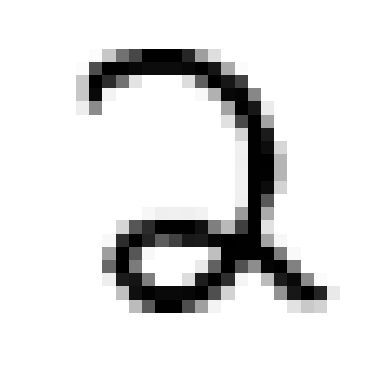

2


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = trainX[24000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(trainY[24000])

## 4. Classificateur binaire

In [17]:
from sklearn.linear_model import SGDClassifier

chiffre = 2

trainY_chiffre = (trainY == chiffre)
testY_chiffre = (testY == chiffre)

sgd = SGDClassifier(random_state=42)
sgd.fit(trainX, trainY_chiffre)

SGDClassifier(random_state=42)

*Pourquoi devons-nous créer une variable cible binaire ?*

Nous devons créer une variable cible binaire car nous souhaitons entraîner un classificateur binaire. En effet, nous souhaitons que notre modèle soit capable de prédire si une image représente un 2 ou non.

*Comment entraînons-nous le modèle SGDClassifier pour cette tâche de classification binaire ?*

En l'entrainant sur les données binaires. En effet, nous avons créé une variable cible binaire, nous pouvons donc entraîner le modèle sur ces données.